In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
Data Dictionary
order_id: Unique ID of the order
customer_id: ID of the customer who ordered the food
restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer
cost: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
rating: Rating given by the customer out of 5
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information
'''

"\nData Dictionary\norder_id: Unique ID of the order\ncustomer_id: ID of the customer who ordered the food\nrestaurant_name: Name of the restaurant\ncuisine_type: Cuisine ordered by the customer\ncost: Cost of the order\nday_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)\nrating: Rating given by the customer out of 5\nfood_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.\ndelivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information\n"

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#Observations: The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

Question 1: How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#checking the number of rows and columns in data
df.shape

(1898, 9)

In [ ]:
#There are 1898 rows, and 9 columns present in the data.

Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#rating is an object, but it should be a string, so I will check this after I look at null values.

In [ ]:
#Retrieve the column labels of the DataFrame
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
#Columns 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' are integers.
#Columns 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' are objects.
#Column 'cost_of_the_order' is a float.

Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Calculate the number of missing values in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
#No missing data

In [ ]:
#No null values in rating, but it is listed as a string, so I am checking why.
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Retrieve number of each type of value in rating column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#Rating column is a string because there are orders where a rating was not given.
#For the analysis, I want to create a new column that converts the 'Not given' values to nan, so that I can change the whole row to numbers.
df['rating_num'] = df['rating'].replace('Not given', np.nan)
df['rating_num'] = df['rating_num'].astype(float)

In [ ]:
#Now there is a new column in the dataset for ratings with floats instead of strings.

In [ ]:
#Check new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0


In [ ]:
#Check for duplicates
df[df.duplicated()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num


In [ ]:
#no duplicates

Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Generate descriptive statistics for numerical columns
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_num
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1162.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,4.344234
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,0.741478
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,3.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,4.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,5.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,5.000000


In [ ]:
#This table shows:
#the count (number of values in the dataset) for each variable
#the mean (average) for each variable
#the standard deviation (dispersion of dataset around mean) for each variable
#the min (smallest value) for each variable
#the 25th percentile (value below which 25% of the data falls) for each variable
#the 50th percentile, AKA the median, (value below which 50% of the data falls) for each variable
#the 75th percentile (value below which 75% of the data falls) for each variable
#the max (largest value) for each variable

In [ ]:
#The minimum time it takes for food to be prepared once an order is placed is 20.00 minutes.
#The average time it takes for food to be prepared once an order is placed is 27.37 minutes.
#The maximum time it takes for food to be prepared once an order is placed is 35.00 minutes.

Question 5: How many orders are not rated?

In [ ]:
#Retrieve unique values in rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Sum of all 'Not given' values in the rating column
(df['rating']=='Not given').sum()

736

In [ ]:
#736 orders were not rated

Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
#Retrieve number of unique values in the order id column
df['order_id'].nunique()

1898

In [ ]:
#no duplicate orders

In [ ]:
#Retrieve number of customer values in the order id column
df['customer_id'].nunique()

1200

In [ ]:
#only 1200 unique customer ids, which means a lot of this data is coming from repeat customers

In [ ]:
#Count the occurrences of each unique customer ID
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
#one customer went and rated resturants in this dataset up to 13 times

In [ ]:
#counting the amount of each customer id in the dataframe of customer ids that occur more than 1 times.
df['customer_id'].value_counts()[df['customer_id'].value_counts()>1]

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
79255      2
342107     2
371590     2
106968     2
155124     2
Name: customer_id, Length: 416, dtype: int64

In [ ]:
#416 customers occur in this dataset more than once

In [ ]:
#the number of resturaunts in dataframe
df['restaurant_name'].nunique()

178

In [ ]:
#there are 178 different restaurants included in this dataset

In [ ]:
#Retrieve number of unique values in cuisine type column
df['cuisine_type'].nunique()

14

In [ ]:
#Retrieve unique values in cuisine type column
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
#There are 14 different cuisine types, which include: Korean, Japanese, Mexican, American, Indian, Italian, Mediterranean, Chinese, Middle Eastern, Thai, Southern, French, Spanish, Vietnamese

In [ ]:
#Count the occurrences of each unique cuisine type
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
#The most common cuisine type in our dataset was American, follwed by Japanese.
#Least common was Vietnamese followed by Spanish

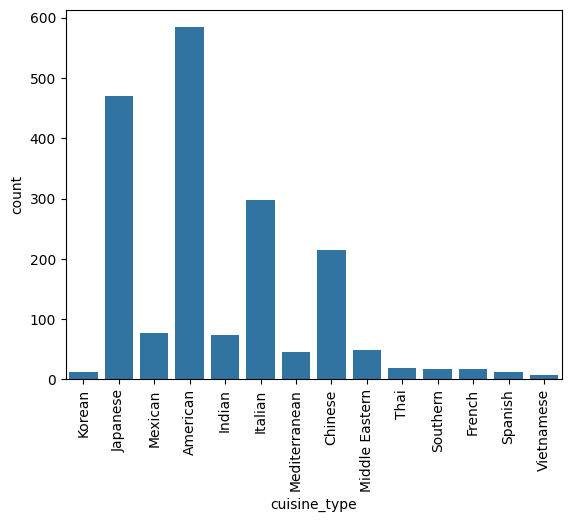

In [ ]:
#Create countplot of cuisine type column
sns.countplot(data = df, x = 'cuisine_type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Checking mean ratings for each type of cuisine
df.groupby('cuisine_type')['rating_num'].mean()

cuisine_type
American          4.298913
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.416667
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating_num, dtype: float64

In [ ]:
#Checking median ratings for each type of cuisine
df.groupby('cuisine_type')['rating_num'].median()

cuisine_type
American          4.0
Chinese           5.0
French            4.5
Indian            5.0
Italian           5.0
Japanese          5.0
Korean            4.0
Mediterranean     4.5
Mexican           5.0
Middle Eastern    4.0
Southern          4.0
Spanish           5.0
Thai              5.0
Vietnamese        4.0
Name: rating_num, dtype: float64

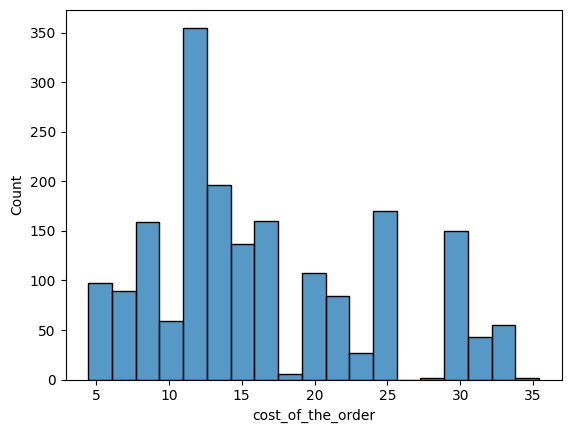

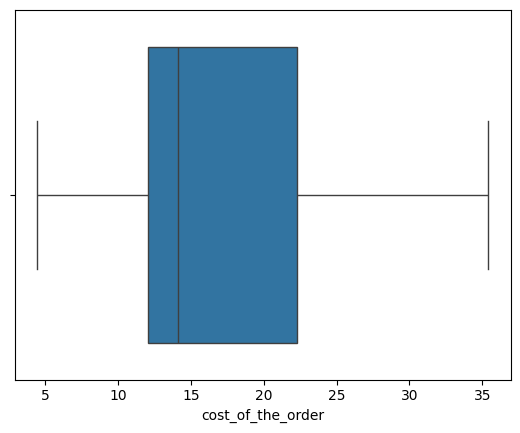

In [ ]:
#Create histogram of cost of the order column
sns.histplot(data=df, x='cost_of_the_order')
plt.show()

sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

In [ ]:
#The price histogram is slightly right skewed, and it peaks between 10 and 15 dollars, meaning this was the most common price point
#The price boxplot shows that the median is slightly below 15, the 25th percentile is about 12, and the 75th percentile is around 22
#The boxplot also shows that there are no outliers, so the whiskers represent the minimum and maximum datapoints, which are around 4 and 35

In [ ]:
#Retrieve unique values n day of the week column
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
#Counting occurences of each unique value in day of the week
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
#Checking percentage of orders made on weekends
(len(df[df['day_of_the_week']=='Weekend'])/df.shape[0]) * 100

71.18018967334035

In [ ]:
#71.18% of orders were made on the weekend.

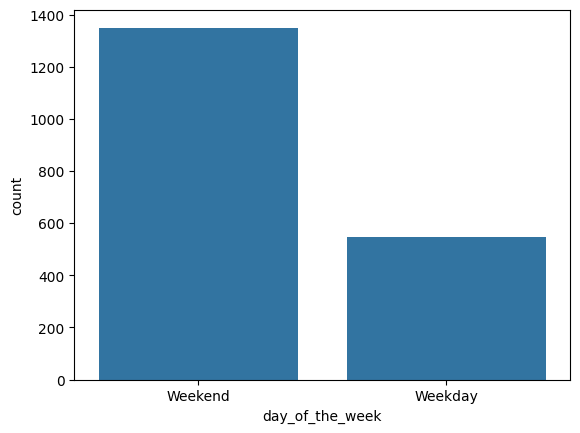

In [ ]:
#Create countplot of day of the week
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()

In [ ]:
#People are much more likely to order food on a weekend than a weekday

In [ ]:
#Retrieve unique values in rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Counting occurences of each unique value in rating column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

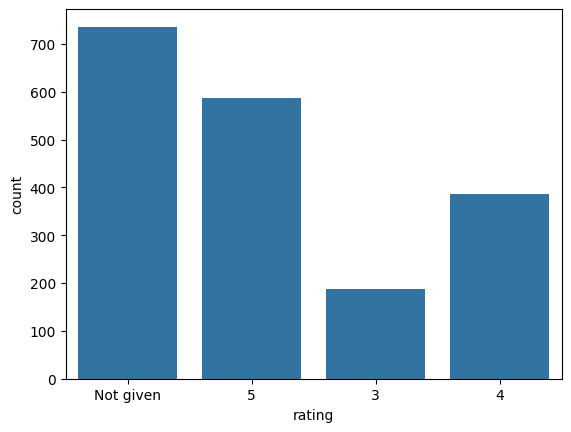

In [ ]:
#countplot of ratings in 'rating' column
sns.countplot(data=df, x='rating')
plt.show()

In [ ]:
#Most ratings were not given by customers
#No ratings below 3, so people were generally satisfied with their orders
#This could also indicate that people who were not satisfied were unlikely to rate their meal

In [ ]:
#Retrieve number of unique values in food preparation time column
df['food_preparation_time'].nunique()

16

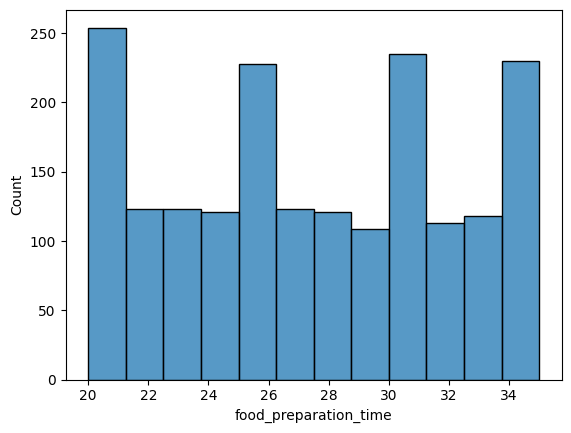

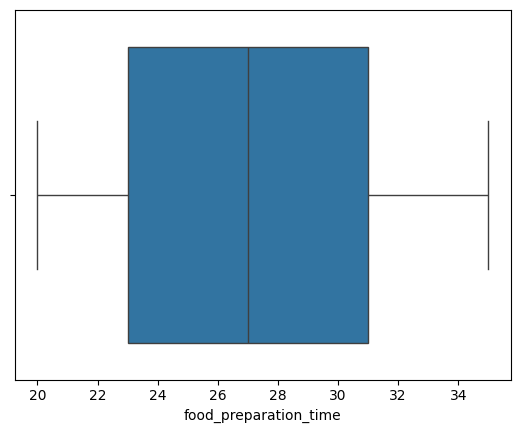

In [ ]:
#Create histogram and boxplot of food preparation time
sns.histplot(data=df, x='food_preparation_time')
plt.show()

sns.boxplot(data=df, x='food_preparation_time')
plt.show()

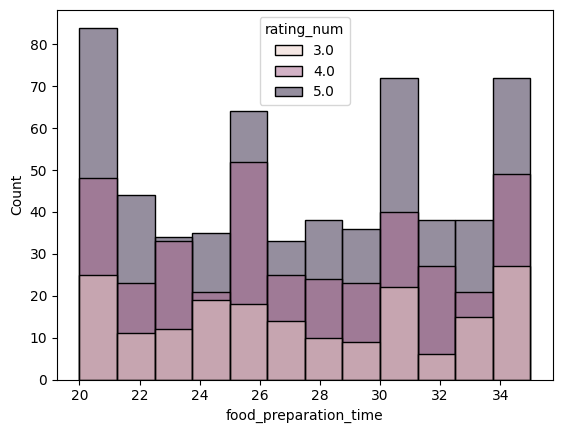

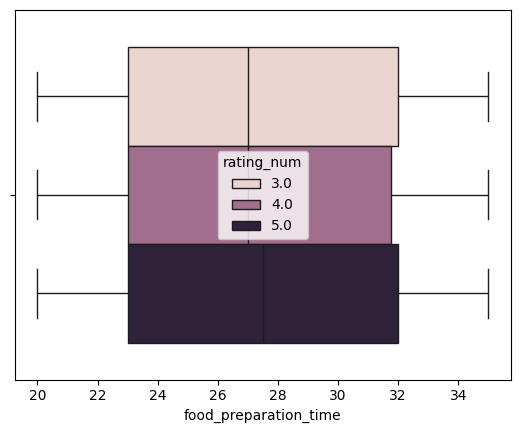

In [ ]:
#Create histogram and boxplot of food preparation time
#adding a hue='rating_num' to see if food prep time effected rating
sns.histplot(data=df, x='food_preparation_time', hue='rating_num')
plt.show()

sns.boxplot(data=df, x='food_preparation_time', hue='rating_num')
plt.show()

In [ ]:
#Food prep time did not seem to have much of an impact on rating.

In [ ]:
#The histogram for food prep time is not normally distributed and follows more of a multimodal distibution.
#The prep time ranges from 20 to 35, with the most common times being about 21, 25, 31 and 34 minutes.

#The boxplot shows us the median is 27, and the 25th percentile is 23 and the 75th is 31.
#It also has no outliers, which means the ends of the whiskers represent the minimum and maximum, which are 20 and 30.

In [ ]:
#Retrieve number of unique values in delivery time column
df['delivery_time'].nunique()

19

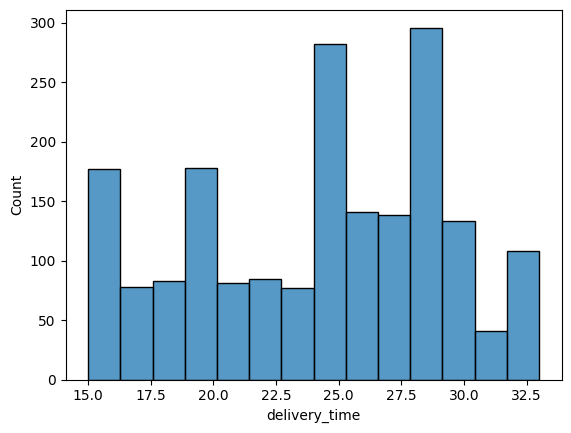

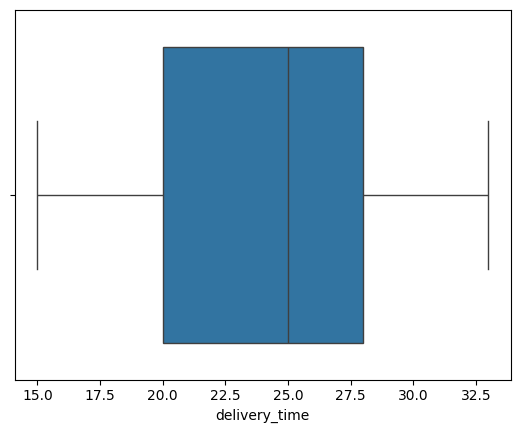

In [ ]:
#Create histogram and boxplot of delivery time column
sns.histplot(data=df, x='delivery_time')
plt.show()

sns.boxplot(data=df, x='delivery_time')
plt.show()

In [ ]:
#The histogram for delivery time is not normally distributed and looks semi-random.
#The delivery time ranges from 15 to 33, with the most common times being about 24 and 28 minutes.

#The boxplot shows us the median is 25, and the 25th percentile is 20 and the 75th is 28.
#It also has no outliers, which means the ends of the whiskers represent the minimum and maximum, which are 15 and 33.

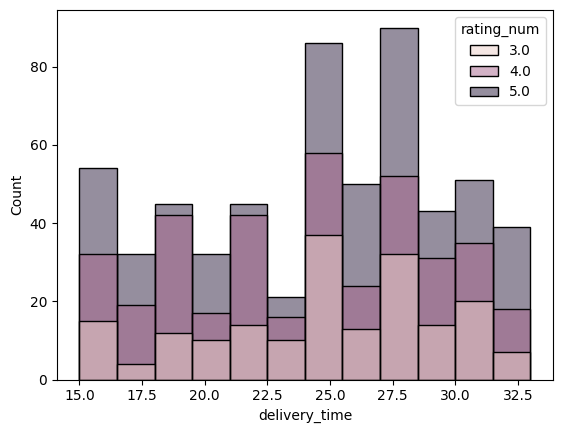

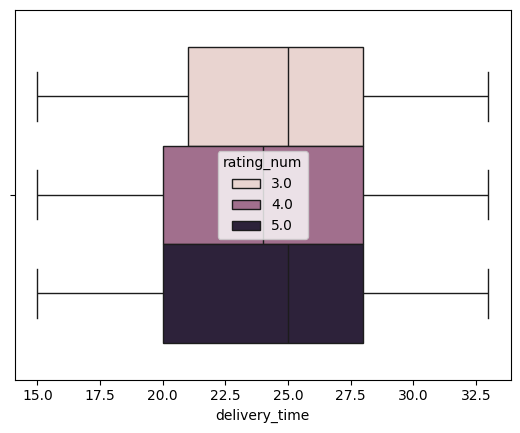

In [ ]:
#Create histogram and boxplot of delivery time column
#adding a hue='rating_num' to see if delivery time effected rating
sns.histplot(data=df, x='delivery_time', hue='rating_num')
plt.show()

sns.boxplot(data=df, x='delivery_time', hue='rating_num')
plt.show()

In [ ]:
#Delivery time did not seem to have much of an impact on rating.

Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Retrieve number of each type of unique value in delivery time, and only checking the top 5
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
#The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

Question 8: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#Group data by day of the week column, and retrieve the number of each unique value in the cuisine type column for each group.
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

In [ ]:
#The most popular cuisine on weekends is American.

Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Retrieve the number of rows in a dataframe that contains only rows that have a cost greater than zero, and dividing by the total rows in datafram, and multiplying quotient by 100 to get percentage
(df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100

29.24130663856691

In [ ]:
#29.24% of the orders cost more than 20 dollars.

Question 10: What is the mean order delivery time? [1 mark]

In [ ]:
#Retrieve the mean of delievry time values
df['delivery_time'].mean()

24.161749209694417

In [ ]:
#The mean order delivery time is 24.16 minutes.

Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Count the occurrences of each unique customer ID and display the top 3
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [ ]:
#Customer 52832 placed 13 orders.
#Customer 47440 placed 10 orders.
#Customer 83287 placed 9 orders.

Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

In [ ]:
#Retrieve columns in dataframe
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'rating_num'],
      dtype='object')

In [ ]:
#Creating this list of numeric columns because some columns (order_id and customer_id) are recognized as numeric but should not be
num_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_num']

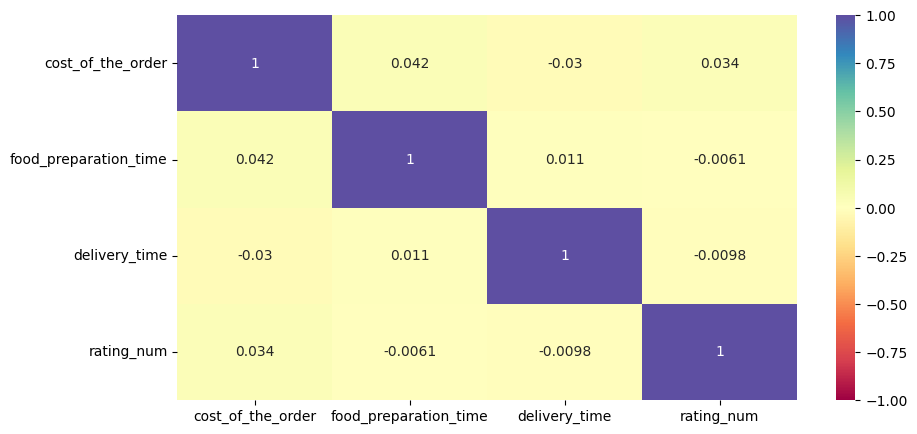

In [ ]:
#Create heatmap of correlations between all variables
plt.figure(figsize=(10,5))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

In [ ]:
#No strong correlations
#Positive correlations: food_preperation_time and delivery_time, cost_of_the_order and food_preperation_time, cost_of_order and rating_num
#Negative correlations: cost_of_the_order and delivery_time, rating_num and food_prepation_time, rating_num and delivery_time

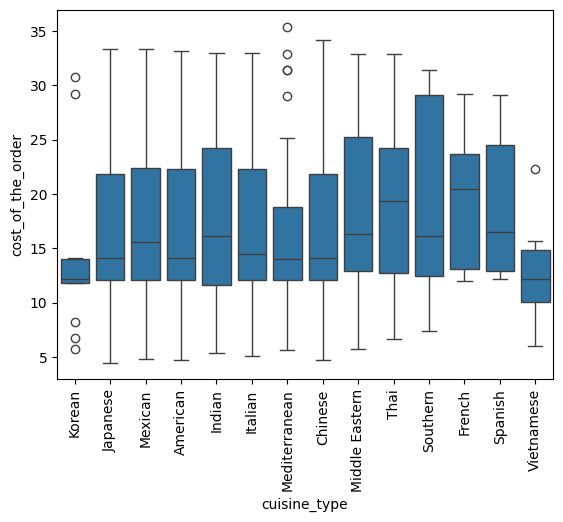

In [ ]:
#Create boxplots of cost of order time for each cuisine type
sns.boxplot(data=df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Vietnamese has the lowest prices, yet it was the least common cuisine type in our dataset
#Korean food has the least amount of variability in price, although it has a few outliers on both ends of the boxplot
#Mediterranean food is typically average priced; however, there were many outliers on the upper end of the boxplot, indicating it can be very expensive
#50% of southern food lies between around $12-29 (very wide range)

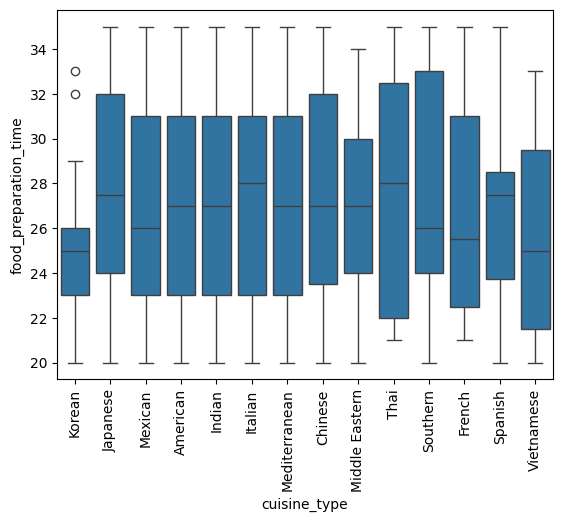

In [ ]:
#Create boxplots of food preparation time for each cuisine type
sns.boxplot(data=df, x = 'cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Korean food tended to be on the quicker side with a couple outliers.
#Thai food has the widest variability in food prep time.
#Spanish food, Thai food, and Italian had slightly higher median food prep times.

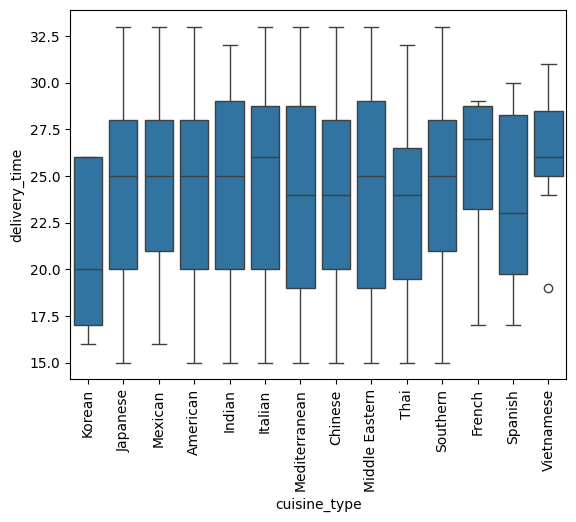

In [ ]:
#Create boxplots of food delivery time for each cuisine type
sns.boxplot(data=df, x = 'cuisine_type', y = 'delivery_time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Korean food also tended to have more instances of quicker delivery time.
#French food has a longer delivery time.
#Vietnames food does not have much variability, and all orders from Vietnamese places had longer delivery times.
#There is one extreme outlier for Vietnamese delivery time.

In [ ]:
#Checking the extreme outlier
df[df['cuisine_type']=='Vietnamese'].loc[df['delivery_time']<20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num
1554,1476957,54630,V-Nam Cafe,Vietnamese,12.08,Weekend,Not given,31,19,NaN


In [ ]:
#This looks like a legitamite order.

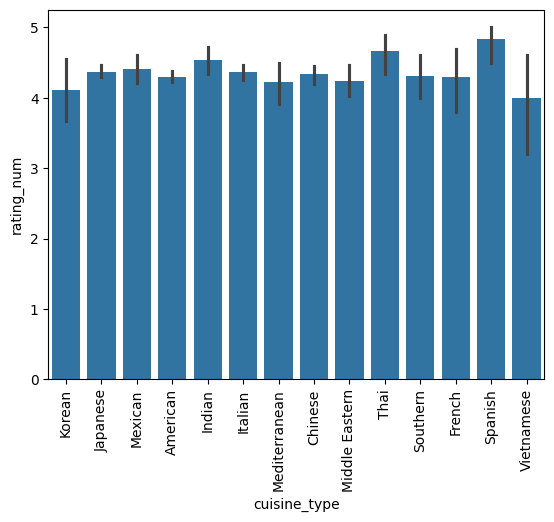

In [ ]:
#Create a barplot of the rating for each cuisine type to show the average rating for each cuisine type
sns.barplot(data=df, x='cuisine_type', y='rating_num')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Vietnamese and Korean had the lowest average ratings
#Spanish and Thai had the highest average ratings

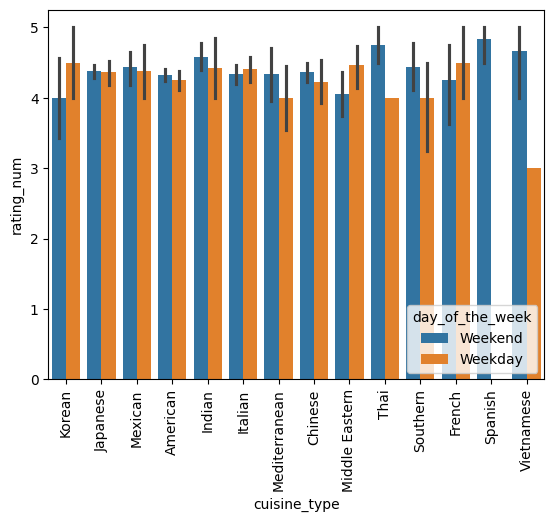

In [ ]:
#Create a barplot of the rating for each cuisine type to see if these rating means vary depending on if it's a weekend or weekday.
sns.barplot(data=df, x='cuisine_type', y='rating_num', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Vietnamese food tends to get much lower ratings when it is a weekday versus weekend.

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

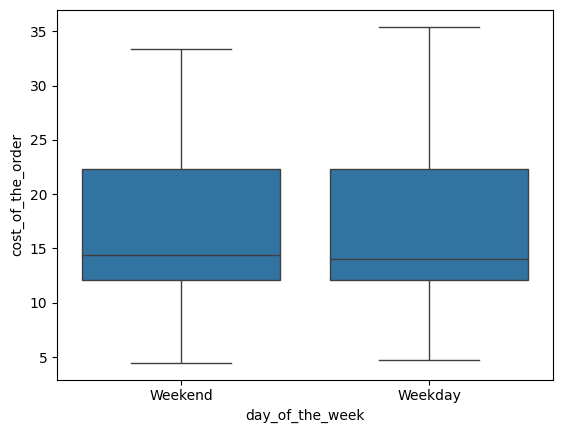

In [ ]:
#Create boxplot for cost of the order for each value in day of the week
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')

In [ ]:
#The difference between cost on weekday versus weekend were very minimal.
#The minimum, 25th percentile, median, and 75th percentile were almost exactly the same.
#On the weekday, the whisker goes slightly higher, indicating people are more likely to spend a bit more on their meals on a weekday (although very marginal difference).

In [ ]:
#Checking some of the extremely cheap orders
df.loc[df['cost_of_the_order']<5]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,4.0
390,1477196,50123,Cafe Habana,Mexican,4.85,Weekend,5,28,22,5.0
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25,NaN
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15,NaN
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26,5.0
664,1476909,366975,Blue Ribbon Sushi Bar & Grill,Japanese,4.85,Weekend,5,20,21,5.0
889,1477787,14869,Shake Shack,American,4.80,Weekend,4,22,24,4.0
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25,3.0
1695,1478302,318665,Blue Ribbon Sushi Bar & Grill,Japanese,4.90,Weekday,4,29,32,4.0


In [ ]:
#Most of the extremely cheap orders had pretty good ratings

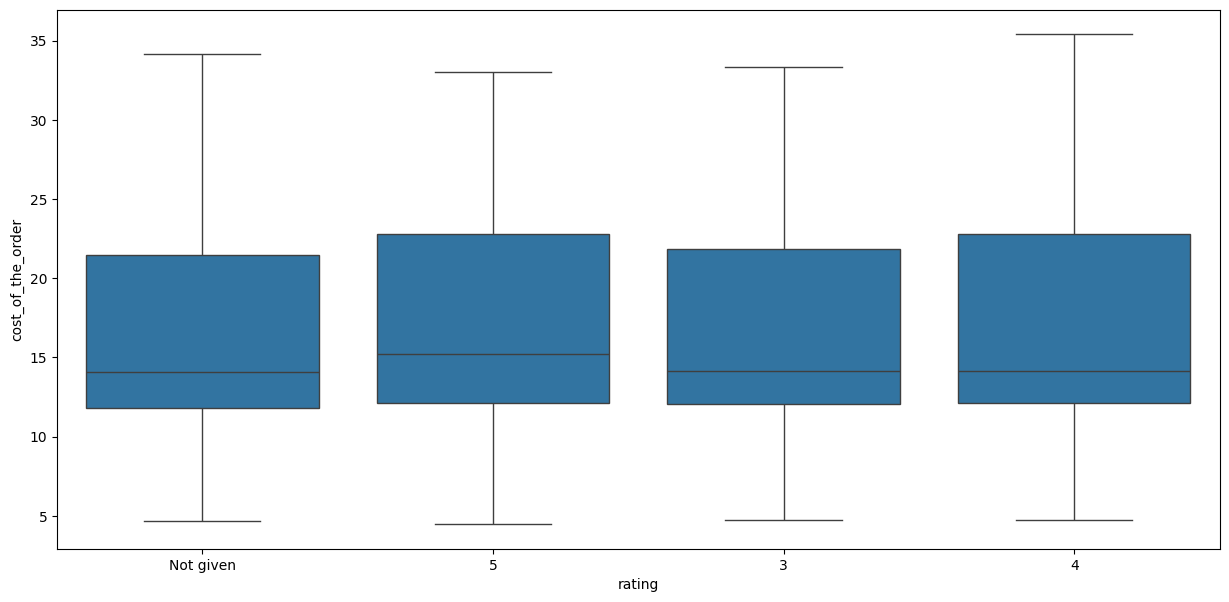

In [ ]:
#It is interesting that the cheapest food did not have low ratings, so I am checking the relationship between cost and rating using a boxplot, since not every entry for rating was numerical.
#Create a boxplot for each rating and the cost of the order
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x = 'rating', y = 'cost_of_the_order')
plt.show()

In [ ]:
#This shows that the ratings seem pretty constant across every price point.
#Orders with no rating given, 5, 3, and 4 stars all have pretty similar variabillity in price.
#This means rating is not dependent on the price of the food.

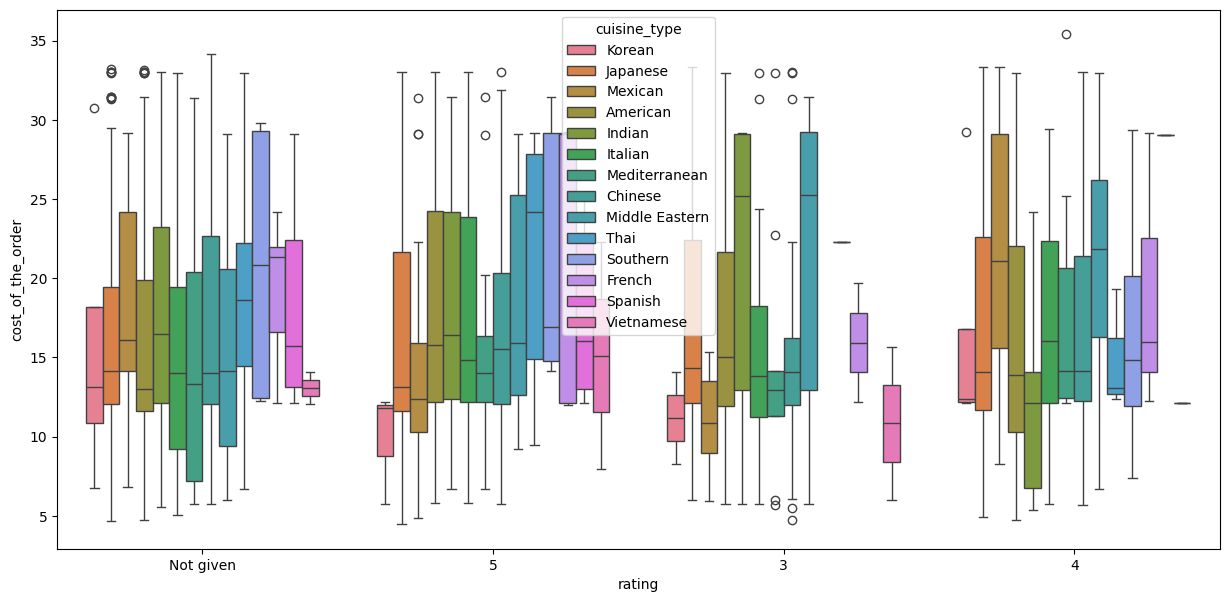

In [ ]:
#Create a boxplot for each cuisine type based on rating and the cost of the order to see if relationship varies depending on the cuisine type
plt.figure(figsize=(15, 7))
sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order', hue='cuisine_type')
plt.show()

In [ ]:
#Cheaper Korean food tends to get higher ratings.
#Price does seem to matter for Vietnamese food, as lower rated Vietnamese food tended to be lower-priced, and higher rated Vietnamese food tended to be higher priced.
#However, for many cuisine types, the rating did not seem to be dependent on the price.

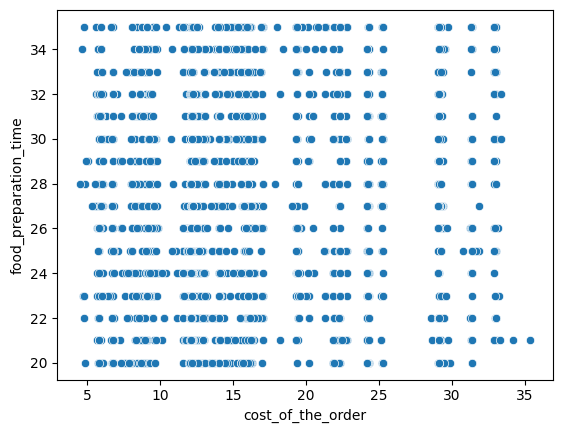

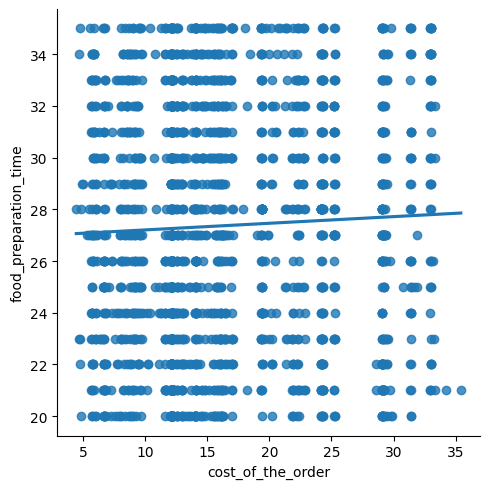

In [ ]:
#Create scatterplot and lmplot of cost of the order and food preparation time
sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time')
plt.show()

sns.lmplot(data=df, x='cost_of_the_order', y='food_preparation_time', ci=False)
plt.show()

In [ ]:
#There is almost no relationship between the food preparation time and the cost of the order.

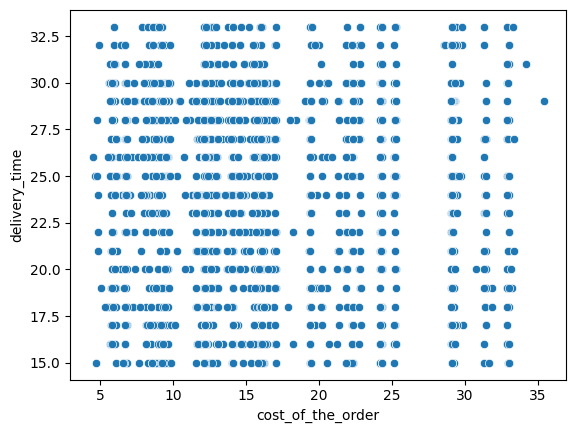

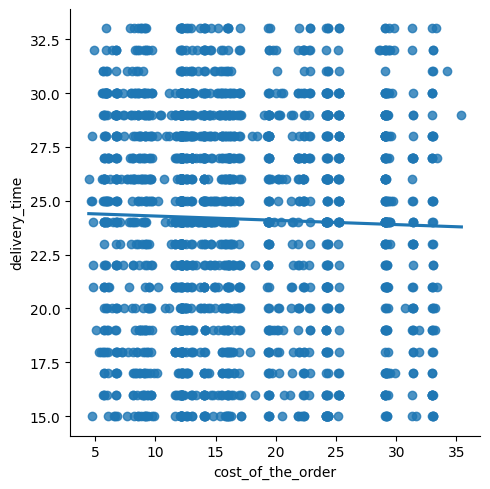

In [ ]:
#Create scatterplot and lmplot cost of the order and delivery time
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time')
plt.show()

sns.lmplot(data=df, x='cost_of_the_order', y='delivery_time', ci=False)
plt.show()

In [ ]:
#Same conclusion with cost of order and delivery time - no relationship.

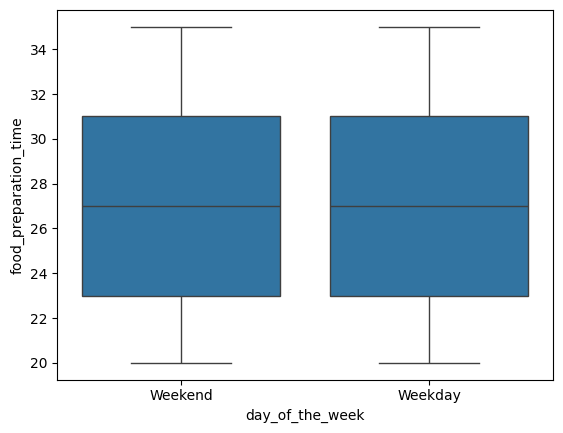

In [ ]:
#Create boxplot for food preparation time for each value in day of the week
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time');

In [ ]:
#There is no difference for food prep time between weekdays and weekends.

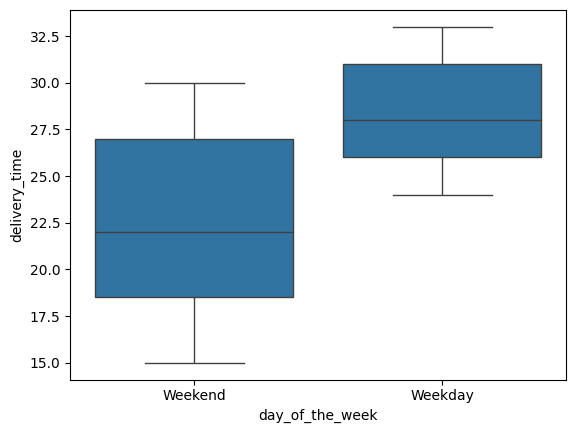

In [ ]:
#Create boxplot for food delivery time for each value in day of the week
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');

In [ ]:
#There is a significant difference between the delivery time on week days versus weekends.
#Similar variability among the two graphs, but the orders on weekends tended to take much longer
#50% of orders on weekends took less delivery time than any orders on weekdays.
#75% of orders on the weekends took less time than the median amount of time orders took to deliver on weekdays.

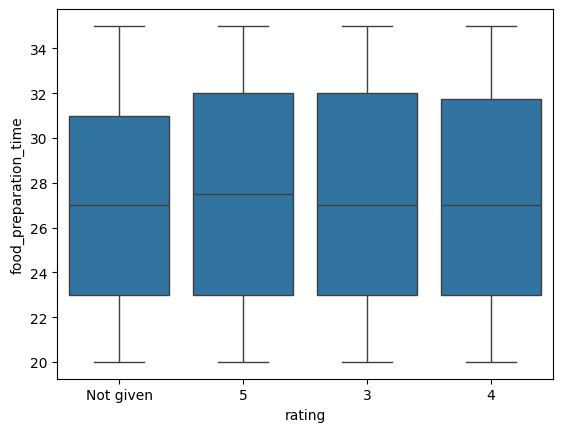

In [ ]:
#Create boxplot for food preparation time for each rating
sns.boxplot(data=df, x='rating', y='food_preparation_time');

In [ ]:
#All graphs look pretty similar
#Orders that did not recieve a rating tended to take slightly less time on 75% of orders
#Ratings do not seem to vary depending on how much time it takes to prepare the food.

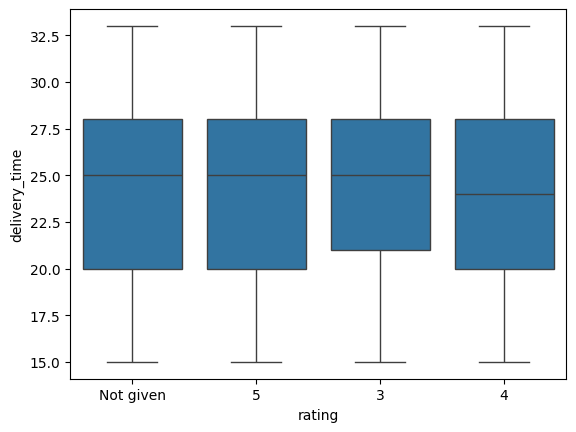

In [ ]:
#Create boxplot for delivery time for each rating
sns.boxplot(data=df, x='rating', y='delivery_time');

In [ ]:
#All graphs look pretty similar here as well
#Ratings do not seem to vary depending on how much time it takes to deliver the food either.

Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
restaurant_ratings_sum = df.groupby('restaurant_name')['rating_num'].count()
restaurant_ratings_sum

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating_num, Length: 178, dtype: int64

In [ ]:
#Create variable that holds the number of ratings for each restaurant
restaurant_ratings_sum = df.groupby('restaurant_name')['rating_num'].count()
#Create new variable that holds all the values from restaurant_ratings_sum that have values greater than 50
top_restaurants = restaurant_ratings_sum[restaurant_ratings_sum > 50]
#Create new dataframe that includes the rows that have a restaurant name in the variable top_restaurants
df_top_restaurants = df[df['restaurant_name'].isin(top_restaurants.index)]

#Create variable that holds the mean rating for each restaurant
mean_rating = df_top_restaurants.groupby('restaurant_name')['rating_num'].mean()
#Create new variable that holds only vales from mean_rating that are greater than 4
top_rated = mean_rating > 4
#CReate new dataframe that includes the rows that have a resturaunt name in top_rated
df_top_rated = df_top_restaurants[df_top_restaurants['restaurant_name'].isin(top_rated.index)]

#Retrieve all unique values in df_top_rated
df_top_rated['restaurant_name'].unique()

array(['Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Shake Shack',
       'Blue Ribbon Sushi'], dtype=object)

In [ ]:
#The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, The Meatball Shop, Shake Shack, and Blue Ribbon Sushi

Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#creating a new column in the dataset that separates the cost of the order into three categories depending on the price: 'Inexpensive','Moderate', and 'Expensive'
#'Inexpensive' is between 0 and 5, which the company charges the restaurant nothing for.
#'Moderate' is between 5 and 20, which the company charges the restaurant 15% for.
#'Expensive' is between 20 and 36 (the max), which the company charges the restaurant 25% for.

df['cost_classification'] = pd.cut(df['cost_of_the_order'], bins=[0,5,20,36], labels=['Inexpensive','Moderate','Expensive'], right=False)

#creating another new column that is going to include the revenue the company got for each order.
#I first created the variable equal to 0 because I have to initialize it before manipulating the new column.
df['charge'] = 0

#Using a for loop to iterate over all the rows in the dataframe.
#Using if conditional statements to see if the requirement is met in the cost classification column.
#If condition is met, we locate the cell in the charge column using the index and column, and assigns the charge value to it.
for index, row in df.iterrows():
    if row['cost_classification'] == 'Inexpensive':
        df.loc[index, 'charge'] = 0
    elif row['cost_classification'] == 'Moderate':
        df.loc[index, 'charge'] = row['cost_of_the_order'] * 0.15
    elif row['cost_classification'] == 'Expensive':
        df.loc[index, 'charge'] = row['cost_of_the_order'] * 0.25

df['charge'].sum()

6166.303

In [ ]:
#The net revenue generated by the company across all orders is $6166.30.

Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Finding all the rows in the dataframe that columns 'food_preparation_time' and 'delivery_time' add up to greater than 60.
#Taking the len() of those rows to see how many rows fit that criteria.
#Dividing that answer by the total rows in the dataframe (df.shape[0]), then multiplying the quotient by 100 to get a percentage.

((len(df[(df['food_preparation_time']+df['delivery_time'])>60]))/df.shape[0]) * 100

10.537407797681771

In [ ]:
#10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#Grouping the data by day of the week, then taking the mean of the delivery time column for both groups
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [ ]:
#The mean delivery time for weekdays is 28.34, and the mean delivery time for weekends is 22.47.
#Orders take longer to deliver on weekdays versus weekends.

Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# **Conclusions:**


*   The dataset included 1898 orders, each with information on order_id,

*   customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week', 'rating', food_preparation_time, and delivery_time.

*   Most columns contained either integers or objects, and the cost of the order was float.

*   There was no missing values in the data, apart from 736 rows in the ‘rating’ column containing ‘Not given’ strings.

*   The average cost of the order was $16.50. The average food preparation time was 27.37 minutes. The minimum time it takes for food to be prepared once an order is placed is 20.00 minutes.
The maximum time it takes for food to be prepared once an order is placed is 35.00 minutes.
The average delivery time was 24.16.

*   The most common order was American food, followed by Japanese food.
Spanish and Vietnamese food were the least common order.

*   Cost of orders were most commonly between 10 and 15 dollars.

*   71.18% of orders were made on the weekend. People are much more likely to order food on a weekend than a weekday.

*   Of the rows that did have a rating, all ratings were at least a 3.

*   The time it took to prepare and deliver the order did not have much of an impact on rating.

*   The top 5 restaurants in terms of the number of orders received were Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

*   The most popular cuisine on weekends and on weekdays is American, followed by Japanese.

*   29.24% of the orders cost more than 20 dollars.

*   The top customers were: customer 52832, who placed 13 orders, customer 47440, who placed 10 orders, and customer 83287, who placed 9 orders.

*   There were no strong correlations between any of the variables.
*   Positive correlations include food_preperation_time and delivery_time, cost_of_the_order and food_preperation_time, cost_of_order and rating_num
*   Negative correlations include cost_of_the_order and delivery_time, rating_num and food_prepation_time, rating_num and delivery_time.

*   Vietnamese has the lowest prices, yet it was the least common cuisine type in our dataset.
*   Korean food has the least amount of variability in price, although it has a few outliers on both ends of the boxplot.
*   Mediterranean food is typically average priced; however, there were many outliers on the upper end of the boxplot, indicating it can be very expensive.
*   50% of southern food lies between around $12-29 (very wide range).

*   Korean food tended to be the quickest to prepare, and the quickest delivery.
French food tended to take longer to deliver.

*   Vietnamese and Korean had the lowest average ratings.
*   Spanish and Thai had the highest average ratings.
*   Vietnamese food tends to get significantly lower ratings when it is a weekday versus weekend.

*   Most of the extremely cheap orders had good ratings.
*   Ratings seem pretty constant across every price point. This means rating is not dependent on the price of the food.

*   Cheaper Korean food tends to get higher ratings.
*   Price does seem to matter for Vietnamese food, as lower rated Vietnamese food tended to be lower-priced, and higher rated Vietnamese food tended to be higher priced.
*   However, for many cuisine types, the rating did not seem to be dependent on the price.

*   There is no relationship between the food preparation time and the cost of the order. There is also no relationship between cost of order and delivery time.

*   The orders on weekends tended to take much longer to deliver.
*   50% of orders on weekends took less delivery time than any orders on weekdays.
*   Ratings do not seem to vary depending on how much time it takes to prepare or deliver the food.

*   Because the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars, the net revenue generated by the company across all orders is $6166.30.

*   10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

*   The mean delivery time for weekdays is 28.34, and the mean delivery time for weekends is 22.47.
Orders take longer to deliver on weekdays versus weekends.



#**Recommendations:**
*   Of the rows that did have a rating, all ratings were at least a 3. So, every person that rated their order was at least relatively satisfied with their order. This could mean that the people that were dissatisfied with their order were less likely to rate their order. So, I recommend incentivizing customers to rate their order, so we can have more data on possibly poorly rated orders, and figure out how to improve those.
The time it took to prepare and deliver the order did not have much of an impact on rating, so I would recommend prioritizing quality over speed.

*   Vietnamese food tends to get significantly lower ratings when it is a weekday versus weekend, so I would recommend to market Vietnamese food more on weekends, so that ratings improve.

*   Cheaper Korean food tends to get higher ratings, so I suggest that these Korean restaurants that are receiving very high ratings should raise their prices, which would increase this company’s revenue because it benefits much more from higher priced orders since it charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.

*   There is no relationship between the food preparation time and the cost of the order. There is also no relationship between cost of order and delivery time. However, I would suggest raising the price for orders that are able to be prepared and delivered much quicker. Or, there could be an added option of speedy delivery that costs extra. This would be particularly advantageous because ratings do not vary based on delivery/preparation time, so ratings would likely not be impacted.

*   The orders on weekends tended to take much longer to deliver, so I recommend prioritizing having more delivery employees on the weekends than the weekdays.

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num,cost_classification,charge
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,Expensive,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,Moderate,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0,Moderate,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0,Expensive,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0,Moderate,1.7385


In [ ]:
!jupyter nbconvert PROJECT1-2.ipynb --to html

[NbConvertApp] Converting notebook PROJECT1-2.ipynb to html
[NbConvertApp] Writing 1763996 bytes to PROJECT1-2.html
